# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>


---

#### <center>RA, Turma e nome dos componentes do grupo</center>

| RA     | Turma |                 Nome                 |
| :----- | :---- | :----------------------------------: |
| 210117 | TIN3  |         Lucas Jeronymo Ribeiro       |
|        |       |                                      |
| 210175 | TIN1  | Matheus Alexander Silva de Alcântara |
| 210090 | TIN1  |         Rafael Vieira Felipe         |
| 210652 | TIN1  |        Renan Antonioli Maitan        |
    

----
### Instruções

**1**. Leia atentamente esta seção e as descrições de cada exercício para garantir que você está executando o que foi pedido.
- O não atendimento de qualquer item descrito, implicará perda de nota.

**2**. O trabalho pode ser feito em grupos de no mínimo 2 pessoas e no máximo 5 pessoas.
 - Apenas uma pessoa do grupo deve submeter o trabalho. 
 - Você deve submeter apenas o arquivo .ipynb.
 - O grupo poderá ser composto por pessoas de qualquer uma das três turmas de processamento de imagens
 
**3**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções
- comentar o código sempre que necessário

**4**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos. 

**5**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

**6**. A única biblioteca de processamento de imagens permitida neste trabalho é a **OpenCV**. Porém, alguns exercícios poderão limitar algumas funções dessa biblioteca que poderão ser usadas. 
- Mesmo nos exercícios que limitam o uso de funções da OpenCV, considere que as operações básicas como abrir, transformar para outro formato de cor e salvar, podem ser feitas com as funções da biblioteca.

**7**. Em todos os exercícios que pedirem para salvar a imagem resultante, tome cuidado de converter a imagem para BGR antes de salvá-la pois esse é o formato padrão da biblioteca OpenCV. Caso contrário, os canais de cores da imagem resultante ficarão trocados. 

**8**. Em todos os exercícios, plote na tela as mesmas imagens que o exercício pedir para salvar. 
- Não é permitido usar a função cv2.imshow() para plotar as imagens. Essa regra é para evitar incompatibilidade e prejudicar a correção. Sempre use a biblioteca matplotlib.

**9**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**10**. Em todos os exercícios você deve tratar tons de cinza inválidos usando a técnica de saturação, há não ser que seja explicitamente pedida outra técnica. Sempre tome cuidado para que as operações executadas não causem desequilíbrio de cores.

----
## Preparação 

Abaixo são inicializadas as bibliotecas e é definido o caminho das pasta **figs** onde estão as imagens usadas em cada exercício. É definido também o caminho da pasta **figs_resultado**, onde você deve salvar as imagens resultantes. 

Se for necessário, você pode alterar a variável que define esse caminho, porém use ela em todos os exercícios. 

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import math

pathFigs = "figs/" # path das imagens que devem ser usadas
pathRes = "figs_resultado/" # path da pasta onde as imagens devem ser salvas

# Cria uma pasta onde as imagens devem ser salvas, se ela não existir
if not os.path.isdir(pathRes):
    os.mkdir(pathRes)

----
## Exercicio 1
Faça uma função que receba dois parâmetros:
 - **imagem1**: uma imagem monocromática ou RGB
 - **imagem2**: uma imagem do mesmo tamanho que a imagem anterior, mas que seja toda preta e que possua apenas um retângulo na cor branca
    
Essa função deve retornar qual a quantidade mínima total de bytes que seria necessário para representar a região da **imagem1** que está localizada na mesma posição do retângulo da **imagem2**.

Teste sua função usando as imagens **figs/natureza.jpeg** e **figs/natureza_regiao.jpeg**.

Obs: não é permitido usar nenhuma função pronta da biblioteca OpenCV. 

In [ ]:
def calcular_bytes(imagem1: np.ndarray, imagem2: np.ndarray) -> int:
    #Verificar se as imagens tem o mesmo tamanho
    if imagem1.shape[:2] == imagem2.shape[:2]:
        return "As imagens devem ter o mesmo tamanho"

    #Aplicar um limiar a imagem
    def aplicar_limiar(img: np.ndarray, limiar: int = 125) -> np.ndarray:
        img[img <= limiar] = 0
        img[img > limiar] = 255
        return img

    #Obter a região de interesse da imagem
    def obter_area_da_imagem(img: np.ndarray, mascara: np.ndarray) -> np.ndarray:
        x, y = np.nonzero(mascara)
        x_min, x_max = x.min(), x.max()
        y_min, y_max = y.min(), y.max()
        return img[x_min : x_max + 1, y_min : y_max + 1]

    #Processar a máscara
    if len(imagem2.shape) != 2:
        imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_RGB2GRAY)
        imagem2 = aplicar_limiar(imagem2)

    #Região de interesse da imagem
    rdi = obter_area_da_imagem(imagem1, np.uint8(imagem2)) 

    #Encontrar o número de bits necessários para armazenar 1 pixel da imagem
    if len(imagem1.shape) == 2: 
        niveis = np.ptp(rdi) + 1 
        num_bits = math.log2(niveis) 
    else:
        r_niveis = np.ptp(rdi[:, :, 0]) + 1
        g_niveis = np.ptp(rdi[:, :, 1]) + 1
        b_niveis = np.ptp(rdi[:, :, 2]) + 1
        num_bits = math.log2(r_niveis) + math.log2(g_niveis) + math.log2(b_niveis)

    #Calcular o número de pixels e multiplicar pelo número de bits
    largura, altura = rdi.shape[:2]
    bits_totais = largura * altura * num_bits

    #Como 1 byte = 8 bits
    bytes_necessarios = math.ceil(bits_totais / 8)
    print("Número de bytes necessários:", bytes_necessarios)

    return bytes_necessarios

----
## Exercicio 2

Use as imagens **figs/procurado.jpg** e **figs/tripaSeca.png** para criar um cartaz de procurado igual ao apresentado na imagem na imagem **figs/tripaSeca_procurado.png**.

Você pode aplicar qualquer técnica aprendida na disciplina e qualquer sequência de operações para chegar no resultado esperado. Porém, sugere-se a seguinte sequência:
- Remova o texto do cartaz usando máscara de cor, conforme ensinado no notebook de operações aritméticas. Porém, em vez de aplicar na imagem inteira, selecione apenas a região onde está o texto para facilitar. 
- Ao remover o texto, ficarão marcas do texto antigo. Para removê-las, aplique algum filtro passa-baixa. 
- Adicione o texto novo usando a função putText da OpenCV
- Aplique um novo filtro passa-baixa para que a imagem do cartaz fique um pouco borrada de forma a similar a foto do personagem. 
- Aumente a imagem **figs/tripaSeca.png** para o rosto do personagem caber na região adequada da imagem **figs/procurado.jpg**. 
- Aplique equalização no rosto do personagem
- Adicione o rosto do personagem no cartaz

Salve a imagem resultante no caminho **figs_resultado/ex02_tripaSeca_procurado.png**

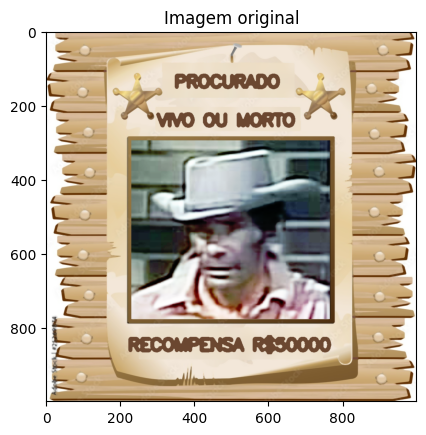

True

In [361]:
imgCartaz = cv2.imread(pathFigs + 'procurado.jpg')
imgCartaz = cv2.cvtColor(imgCartaz, cv2.COLOR_BGR2RGB)

textos = [[[86, 180], [314,670]], [[205,270], [295,686]], [[800,886], [250,746]]]
novos_textos = ['Procurado', 'Vivo ou Morto', 'Recompensa R$50000']

limiar = 150
for i, texto in enumerate(textos):
    mask = imgCartaz[texto[0][0]:texto[0][1], texto[1][0]:texto[1][1]]
    mask = np.where(mask < limiar, [238, 222, 196], mask)
    mask = mask.astype(imgCartaz.dtype)
    imgCartaz[texto[0][0]:texto[0][1], texto[1][0]:texto[1][1]] = cv2.GaussianBlur(mask, (85, 85), 0)
    text = novos_textos[i].upper()
    # font = do a font using a bold style
    # font = 
    font = cv2.BORDER_ISOLATED
    fontscale = 1.5
    fontcolor = (107,71,48)
    lineType = 9
    textSize = cv2.getTextSize(text, font, fontscale, lineType)[0]
    textX = int((mask.shape[1] - textSize[0]) / 2) + texto[1][0]
    textY = int((mask.shape[0] + textSize[1]) / 2) + texto[0][0]
    cv2.putText(imgCartaz, text, (textX, textY), font, fontscale, fontcolor, lineType)

imgCartaz = cv2.medianBlur(imgCartaz, 5)

# 300, 770, 230, 760
imgTripa = cv2.imread(pathFigs + 'tripaSeca.png')
imgTripa = cv2.cvtColor(imgTripa, cv2.COLOR_BGR2RGB)

cara = imgTripa[40:180, 355:495]
quadrado = imgCartaz[295:777, 230:765]
cara = cv2.resize(cara, (quadrado.shape[1], quadrado.shape[0]))
canais = cv2.split(cara)
canais_equalizados = [cv2.equalizeHist(canal) for canal in canais]
cara = cv2.merge(canais_equalizados)

imgCartaz[295:777, 230:765] = cara

plt.imshow(imgCartaz)
plt.title('Imagem original')
plt.show()

cv2.imwrite(pathRes + 'ex02_tripaSeca_procurado.png', cv2.cvtColor(imgCartaz, cv2.COLOR_RGB2BGR))



----
## Exercicio 3

Remova o ruído da imagem **figs/faculdade.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem **figs/faculdade_corrigida.png**. 

Salve a imagem resultante no caminho **figs_resultado/ex03.png**.

In [362]:
#Carregar a imagem original
imagem_original = cv2.imread('figs/faculdade.png')

#Definir kernels para abertura e fechamento
kernel_abertura = np.ones((2, 2), np.uint8)
kernel_fechamento = np.ones((4, 4), np.uint8)

#Aplicar filtro de abertura para remover ruído branco
imagem_abertura = cv2.morphologyEx(imagem_original, cv2.MORPH_OPEN, kernel_abertura)

#Aplicar filtro de fechamento para remover ruído preto
imagem_fechamento = cv2.morphologyEx(imagem_abertura, cv2.MORPH_CLOSE, kernel_fechamento)

#Salvar a imagem final
cv2.imwrite('figs_resultado/ex03.png', imagem_fechamento)


True

----
## Exercicio 4

Crie uma matriz usando a biblioteca numpy. Depois, transforme essa matriz em uma imagem que corresponda a bandeira mostrada na figura **figs/bandeira.png**
 
Para gerar a bandeira, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **figs/simbolos.png** (para remover os pontos brancos).
- operações aritméticas entre a matriz e os símbolos contidos na imagem **figs/simbolos.png**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Salve a imagem resultante no caminho **figs_resultado/ex04_bandeira.png**

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

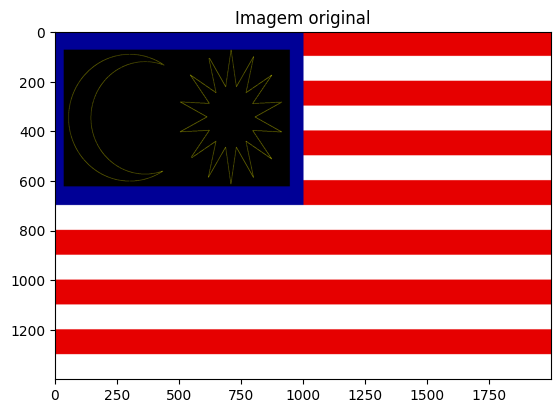

In [363]:
altura = 1400
largura = 2000
matriz = np.zeros((altura, largura, 3), dtype=np.uint8)

lines = altura//14
for i in range(14):
    matriz[i*lines:(i+1)*lines, :] = [230, 0, 0] if i % 2 == 0 else [255,255,255]

matriz[0:altura//2, 0:largura//2] = [0, 0, 150]
 
imgSimbolos = cv2.imread(pathFigs + 'simbolos.png', cv2.IMREAD_UNCHANGED)


imgSimbolos = cv2.cvtColor(imgSimbolos, cv2.COLOR_BGR2RGB)
#imgSimbolos = np.where(imgSimbolos < 1, [0,0,150], imgSimbolos)

imgSimbolos = np.where(imgSimbolos > 0, [255,255,0], imgSimbolos)
imgSimbolos = imgSimbolos.astype(np.uint8) 
kernel = np.ones((3,3),np.uint8)

imgSimbolos = cv2.morphologyEx(imgSimbolos, cv2.MORPH_TOPHAT, kernel)


lua = imgSimbolos[0:imgSimbolos.shape[0]//2+70, :]
sol = imgSimbolos[imgSimbolos.shape[0]//2+70:, :]

ajuste_tamanho = 20
ajuste_altura = 150
figura_altura = altura//2-ajuste_altura
figura_largura = largura//2//2-ajuste_tamanho
cola = 30
lua = cv2.resize(lua, (figura_largura, figura_altura))
sol = cv2.resize(sol, (figura_largura, figura_altura))

matriz[ajuste_altura//2:altura//2-ajuste_altura//2, ajuste_tamanho+cola//2:largura//2//2+cola//2] = lua
matriz[ajuste_altura//2:altura//2-ajuste_altura//2, largura//2//2-ajuste_tamanho-cola//2:largura//2-ajuste_tamanho-(ajuste_tamanho+cola//2)] = sol





plt.imshow(matriz)
plt.title('Imagem original')   
plt.show()



----
## Exercicio 5

Crie uma função que receba uma imagem e modifique ela para que fique quadrada. Se a imagem estiver na orientação paisagem, você precisará adicionar espaço na parte superior e inferior. Da mesma forma, para retrato (mais alto que largo), você adicionará espaço nas laterais. Certifique-se de que seu programa centralize a imagem entre o espaço.

Para preecher o novo espaço, você deverá testar apresentar as duas variações a seguir:
- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preenchê-lo com as $n$ linhas ou colunas vizinhas da imagem. Depois disso, você deverá aplicar uma filtro de média nessa região. 
 - Você deverá criar seu próprio filtro de média. Não é permitido usar nenhuma função pronta para isso. Considere sempre que será criado padding na imagem para que o filtro resulte em uma imagem do mesmo tamanho. Considere também que a máscara sempre será quadrada e com tamanho ímpar. 

- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preencher com a média de todos os valores RGB das $n$ linhas ou colunas vizinhas da imagem.

Teste a função nas imagens **figs/praia.jpg** e **figs/houses.jpg**. 
Salve as imagens resultante nos caminhos **figs_resultado/ex05_praia.png** e **figs_resultado/ex05_houses.png**.

Obs. Neste exercício, não é permitido usar usada nenhuma função pronta da OpenCV. Além disso, as únicas funções prontas do Numpy que podem ser usada são np.pad, np.mean, np.sum, np.ones e np.zeros. 

In [364]:
def aplicar_filtro_media(arr, tamanho_mascara):
    
    mascara = np.ones((tamanho_mascara, tamanho_mascara)) / (tamanho_mascara ** 2)
    
    pad = tamanho_mascara // 2
    arr_padded = np.pad(arr, ((pad, pad), (pad, pad), (0, 0)), mode='edge')
    
    resultado = np.zeros_like(arr)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            for k in range(arr.shape[2]):
                resultado[i, j, k] = np.sum(arr_padded[i:i+tamanho_mascara, j:j+tamanho_mascara, k] * mascara)
    return resultado

def criar_imagem_quadrada(img, filtro_mascara_tamanho=3):
    altura, largura, _ = img.shape
    
    if largura > altura:
        diff = largura - altura
        pad_cima = diff // 2
        pad_baixo = diff - pad_cima
        padding = [(pad_cima, pad_baixo), (0, 0), (0, 0)]
    else:
        diff = altura - largura
        pad_esquerda = diff // 2
        pad_direita = diff - pad_esquerda
        padding = [(0, 0), (pad_esquerda, pad_direita), (0, 0)]
    
    img_padded = np.pad(img, padding, mode='edge')
    
    if largura > altura:
        img_padded[:pad_cima, :, :] = aplicar_filtro_media(img_padded[:pad_cima, :, :], filtro_mascara_tamanho)
        img_padded[-pad_baixo:, :, :] = aplicar_filtro_media(img_padded[-pad_baixo:, :, :], filtro_mascara_tamanho)
    else:
        img_padded[:, :pad_esquerda, :] = aplicar_filtro_media(img_padded[:, :pad_esquerda, :], filtro_mascara_tamanho)
        img_padded[:, -pad_direita:, :] = aplicar_filtro_media(img_padded[:, -pad_direita:, :], filtro_mascara_tamanho)
    
    return img_padded

def criar_imagem_quadrada_com_media(img):
    altura, largura, _ = img.shape
    
    if largura > altura:
        diff = largura - altura
        pad_cima = diff // 2
        pad_baixo = diff - pad_cima
        padding = [(pad_cima, pad_baixo), (0, 0), (0, 0)]
    else:
        diff = altura - largura
        pad_esquerda = diff // 2
        pad_direita = diff - pad_esquerda
        padding = [(0, 0), (pad_esquerda, pad_direita), (0, 0)]
    
    
    img_padded = np.pad(img, padding, mode='constant', constant_values=0)
    
    if largura > altura:
        media_superior = np.mean(img[:pad_cima, :, :], axis=0, keepdims=True)
        media_inferior = np.mean(img[-pad_baixo:, :, :], axis=0, keepdims=True)
        img_padded[:pad_cima, :, :] = np.tile(media_superior, (pad_cima, 1, 1))
        img_padded[-pad_baixo:, :, :] = np.tile(media_inferior, (pad_baixo, 1, 1))
    else:
        media_esquerda = np.mean(img[:, :pad_esquerda, :], axis=1, keepdims=True)
        media_direita = np.mean(img[:, -pad_direita:, :], axis=1, keepdims=True)
        img_padded[:, :pad_esquerda, :] = np.tile(media_esquerda, (1, pad_esquerda, 1))
        img_padded[:, -pad_direita:, :] = np.tile(media_direita, (1, pad_direita, 1))
    
    return img_padded

def processar_e_salvar_imagens(caminhos_imagens, caminho_saida):
    for caminho_imagem in caminhos_imagens:
        img = cv2.imread(caminho_imagem)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_quadrada_filtro = criar_imagem_quadrada(img_rgb)
        img_quadrada_media = criar_imagem_quadrada_com_media(img_rgb)

        img_quadrada_filtro_bgr = cv2.cvtColor(img_quadrada_filtro, cv2.COLOR_RGB2BGR)
        img_quadrada_media_bgr = cv2.cvtColor(img_quadrada_media, cv2.COLOR_RGB2BGR)

        nome_arquivo = caminho_imagem.split('/')[-1].split('.')[0]
        cv2.imwrite(f'{caminho_saida}/ex05_{nome_arquivo}_filtro.png', img_quadrada_filtro_bgr)
        cv2.imwrite(f'{caminho_saida}/ex05_{nome_arquivo}_media.png', img_quadrada_media_bgr)


caminhos_imagens = ['figs/praia.jpg', 'figs/houses.jpg']
caminho_saida = 'figs_resultado'


processar_e_salvar_imagens(caminhos_imagens, caminho_saida)



----
## Exercicio 6

Separe os círculos das linhas na **figs/circulos_retas.png**. Salve as imagens resultantes nos caminhos **figs_resultado/circulo.png** e **figs_resultado/linha.png**. A imagem **figs_resultado/ex06_circulo.png** deve conter apenas círculos e a imagem **figs_resultado/ex06_linha.png** deve conter apenas linhas. Para conseguir separar os objetos, você só pode aplicar operações morfológicas, limiarização, operações aritméticas (soma, subtração, etc), operações lógicas (AND, OR, etc) e rotação. 

Obs. A biblioteca OpenCV só pode ser usada para criar erosão,  dilatação e para criar os elementos estruturantes. Qualquer outra operação morfológica deve ser feita combinando erosão ou dilatação, sem usar nenhuma função pronta. A biblioteca OpenCV também pode ser usada para fazer operações lógicas, operações aritméticas e rotação.  

In [ ]:
def separar_circulos_linhas(img_path, circulo_path, linha_path):
    # Ler a imagem
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Limiarização
    _, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Criar elementos estruturantes
    kernel_circulo = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    kernel_linha = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
    
    # Separar linhas usando abertura com kernel horizontal grande
    linhas = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_linha)
    linhas = cv2.morphologyEx(linhas, cv2.MORPH_CLOSE, kernel_linha)
    
    # Obter círculos subtraindo as linhas da imagem original
    circulos = cv2.subtract(img_bin, linhas)
    
    # Refinar a imagem de círculos com operações morfológicas
    circulos = cv2.morphologyEx(circulos, cv2.MORPH_OPEN, kernel_circulo)
    circulos = cv2.morphologyEx(circulos, cv2.MORPH_CLOSE, kernel_circulo)
    
    # Inverter as imagens de volta para o formato original
    linhas = cv2.bitwise_not(linhas)
    circulos = cv2.bitwise_not(circulos)
    
    # Salvar os resultados
    cv2.imwrite(circulo_path, circulos)
    cv2.imwrite(linha_path, linhas)

# Caminhos das imagens
img_path = 'figs/circulos_retas.png'
circulo_path = 'figs_resultado/ex06_circulo.png'
linha_path = 'figs_resultado/ex06_linha.png'

# Separar círculos e linhas e salvar as imagens
separar_circulos_linhas(img_path, circulo_path, linha_path)

 



----
## Exercicio 7

Com base nas noções de vizinhança, adjacência e componentes conexos ensinados na disciplina, crie uma função que receba uma imagem com cores preto e branco e conte quando objetos brancos existem nela. Considere uma conectividade-4. 

Teste sua função na imagem **figs/circles.png**

In [345]:
import cv2
import numpy as np

def contar_objetos_brancos(imagem):
    img = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)
    
    _, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    direcoes = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    altura, largura = bin_img.shape
    
    visitado = np.zeros((altura, largura), dtype=bool)
    
    def dfs(x, y):
        stack = [(x, y)]
        while stack:
            cx, cy = stack.pop()
            for dx, dy in direcoes:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < altura and 0 <= ny < largura and not visitado[nx, ny] and bin_img[nx, ny] == 255:
                    visitado[nx, ny] = True
                    stack.append((nx, ny))
    
    contagem_objetos = 0
    
    for i in range(altura):
        for j in range(largura):
            if bin_img[i, j] == 255 and not visitado[i, j]:
                contagem_objetos += 1
                visitado[i, j] = True
                dfs(i, j)
    
    return contagem_objetos

imagem_path = 'figs/circles.png'
quantidade_objetos = contar_objetos_brancos(imagem_path)
print(f"Quantidade de objetos brancos na imagem: {quantidade_objetos}")

Quantidade de objetos brancos na imagem: 4


----
## Exercicio 8

Extraia os contornos da rachadura da imagem **figs/rachadura.jpg**. Para isso, é permitido aplicar apenas as seguintes operações: alguma técnica de segmentação, alguma técnica de limiarização automática e algum filtro. 
 - Limite-se aos métodos ensinados na disciplina
 
O resultado mínimo esperado é apresentado na imagem **figs_resultado/rachadura_contorno.png**